In [1]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
boston = pd.read_csv('D:/Users/ssadasivam6709/Downloads/car_price.csv', encoding='ISO-8859-1')

In [40]:
boston.shape

(998, 16)

In [41]:
boston.columns

Index(['CID', 'DATE', 'CAR NAME', 'OWNERSHIP', 'OFFER', 'PRICE', 'TYPE',
       'YEAR', 'MODE', 'HP', 'DISCOUNT', 'MILEAGE', 'FUEL', 'STATUS',
       'DUPLICATE', 'IGNORE'],
      dtype='object')

In [42]:
boston.describe()

,CID,PRICE,YEAR,HP,DISCOUNT,MILEAGE,IGNORE
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.0
mean,500.434870,7723.106212,2006.269539,130.306613,119584.168337,6.199399,0.0
std,289.024082,6793.505284,4.021818,63.669944,42271.895739,3.472968,0.0
min,1.000000,1050.000000,2000.000000,0.000000,5000.000000,0.000000,0.0
25%,250.250000,2990.000000,2003.000000,90.000000,90000.000000,3.000000,0.0
50%,500.500000,5450.000000,2006.000000,122.000000,150000.000000,6.000000,0.0
75%,750.750000,10397.250000,2009.000000,163.000000,150000.000000,9.000000,0.0
max,1000.000000,38800.000000,2016.000000,408.000000,150000.000000,12.000000,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019372DFD488>]],
      dtype=object)

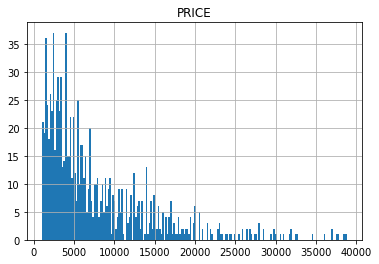

In [43]:
boston.hist(column='PRICE', bins=200)

In [44]:
boston.corr()

,CID,PRICE,YEAR,HP,DISCOUNT,MILEAGE,IGNORE
CID,1.000000,-0.034431,-0.022272,-0.025803,0.008742,0.021484,NaN
PRICE,-0.034431,1.000000,0.602202,0.533514,-0.455362,-0.006126,NaN
YEAR,-0.022272,0.602202,1.000000,0.082497,-0.548426,-0.018501,NaN
HP,-0.025803,0.533514,0.082497,1.000000,0.092399,0.007716,NaN
DISCOUNT,0.008742,-0.455362,-0.548426,0.092399,1.000000,-0.003602,NaN
MILEAGE,0.021484,-0.006126,-0.018501,0.007716,-0.003602,1.000000,NaN
IGNORE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
boston[boston.duplicated()]

,CID,DATE,CAR NAME,OWNERSHIP,OFFER,PRICE,TYPE,YEAR,MODE,HP,DISCOUNT,MILEAGE,FUEL,STATUS,DUPLICATE,IGNORE


In [56]:
boston[boston.FUEL.isnull()]

,CID,DATE,CAR NAME,OWNERSHIP,OFFER,PRICE,TYPE,YEAR,MODE,HP,DISCOUNT,MILEAGE,FUEL,STATUS,DUPLICATE,IGNORE
63,64,30-03-2016 23:52,VW_Golf_VII_plus_1_Jahr_Neuwahlen_Garantie,private,offer,25000,limousine,2013,2.0,140,40000,0,NaN,No,30-03-2016 00:00,0
81,82,24-03-2016 22:56,Hyundai_Atos_1.1_Prime__TÜV_bis_12/2017,private,offer,1450,Small Car,2005,1.0,58,150000,5,NaN,NaN,24-03-2016 00:00,0
83,84,04-04-2016 22:45,Chrysler_PT_Cruiser_Cabrio,private,offer,3500,cabrio,2006,1.0,134,150000,0,NaN,NaN,04-04-2016 00:00,0
90,91,26-03-2016 16:54,330d_Aut_._Xenon_Standheizung_Leder,private,offer,9400,NaN,2007,2.0,231,150000,0,NaN,NaN,26-03-2016 00:00,0
118,119,24-03-2016 18:38,Volkswagen_Golf_Variant_1.6_TDI_DPF_BlueMotion,private,offer,10000,Combi,2010,1.0,105,150000,11,NaN,No,24-03-2016 00:00,0
153,154,30-03-2016 09:56,Volkswagen_Passat,private,offer,9900,limousine,2005,1.0,0,125000,2,NaN,No,30-03-2016 00:00,0
160,161,10-03-2016 10:53,Mercedes_Benz_Bestattungswagen/Leichenwagen,private,offer,8400,Combi,2001,2.0,143,150000,8,NaN,No,10-03-2016 00:00,0
270,271,26-03-2016 17:58,BMW_320ci_Cabrio_Tuev_neu_viele_neuteile._MPac...,private,offer,6000,cabrio,2001,1.0,0,150000,3,NaN,No,26-03-2016 00:00,0
393,395,30-03-2016 16:42,Audi_A6_3.0TDI_Vollausstattung,private,offer,17400,Combi,2012,2.0,204,150000,9,NaN,Yes,30-03-2016 00:00,0
396,398,19-03-2016 10:58,Honda_CRV_2.0_Executive_Top_Zustamd,private,offer,8000,suv,2007,1.0,140,150000,6,NaN,No,19-03-2016 00:00,0


In [46]:
boston["MODE"]=boston["MODE"].replace("automatic",2)

In [93]:
boston.head(10)

,PRICE,YEAR,MODE,HP,KM,# OF SEATS,FUEL
0,3850,2004,1.0,94,50000,7,78
1,5999,2007,1.0,140,150000,5,64
2,5990,2007,2.0,150,150000,2,64
3,4000,2005,1.0,150,150000,9,64
4,12950,2005,1.0,200,125000,3,78
5,3600,2000,2.0,129,150000,5,78
6,4450,2003,1.0,131,150000,7,64
7,10500,2010,1.0,146,80000,8,78
8,10900,2004,2.0,333,150000,12,78
9,17250,2013,1.0,122,30000,10,78


In [48]:
boston["MODE"]=boston["MODE"].replace("manual",1)

In [50]:
boston["MODE"].fillna(1.0, inplace=True)

In [ ]:
boston[boston.STATUS.isnull()]

In [58]:
boston["FUEL"].fillna("diesel", inplace=True)

In [60]:
boston["FUEL"]=boston["FUEL"].replace("diesel",64)

In [87]:
boston["FUEL"]=boston["FUEL"].replace("cng",40)

In [63]:
boston["STATUS"].fillna("No", inplace=True)

In [78]:
boston.drop(columns=['IGNORE'],inplace=True)

In [83]:
boston.head(2)

,PRICE,YEAR,MODE,HP,KM,# OF SEATS,FUEL
0,3850,2004,1.0,94,50000,7,78
1,5999,2007,1.0,140,150000,5,64


In [82]:
boston = boston.rename(columns={'MILEAGE':'# OF SEATS'})

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston[boston.columns[~boston.columns.isin(['PRICE'])]],
boston['PRICE'],
test_size = 0.33,
random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(668, 6)
(330, 6)
(668,)
(330,)


In [89]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
pd.DataFrame(zip(X_train.columns, lm.coef_.tolist()), columns=["names","coefficient"])

,names,coefficient
0,YEAR,673.005026
1,MODE,1329.847928
2,HP,48.387524
3,KM,-0.046850
4,# OF SEATS,-30.234102
5,FUEL,-77.846063


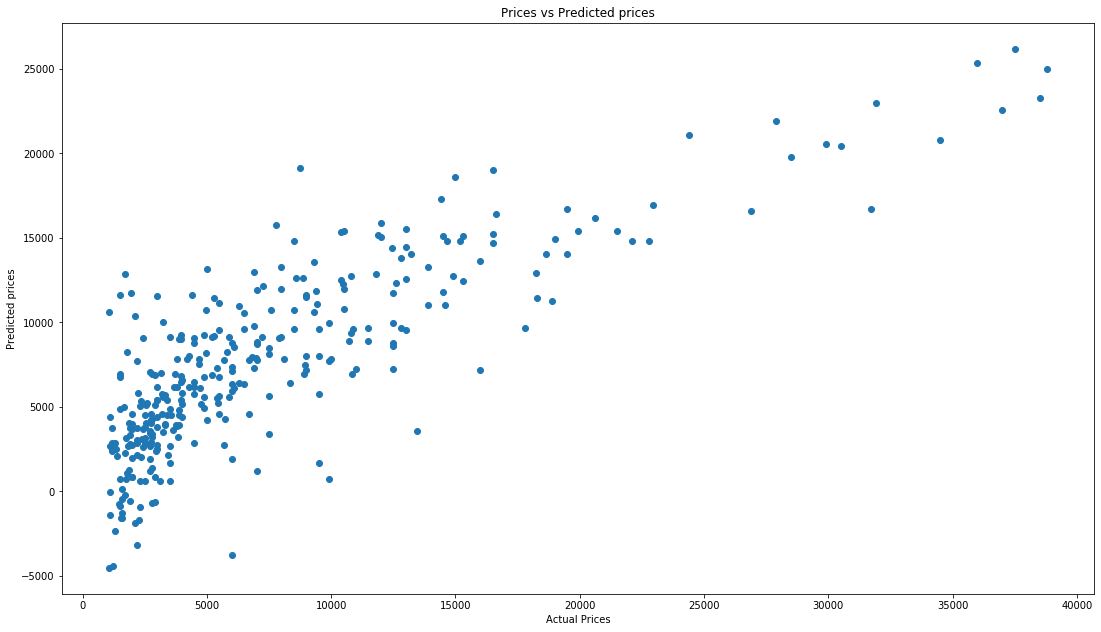

In [91]:
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)

In [94]:
from sklearn.metrics import mean_squared_error
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print("-------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

y_test_predict = lm.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))

print("The model performance for testing set")
print("-------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
-------------------------------------
RMSE is 3817.8861863911034


The model performance for testing set
-------------------------------------
RMSE is 4123.865009167685
